# Test Multiple Polynomial Degree Forecast

## Data Source

- Using Hubei province from JHU Data


## Summary

- 2-order and 3-order polynomial for growing trends
- 4-order and 5-order polynomial for inflecting trends



In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np 
from sklearn.linear_model import LinearRegression 
from sklearn.preprocessing import PolynomialFeatures 
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import r2_score as rsq
from math import sqrt

In [3]:
hubei = pd.read_csv("../data/hubei.txt", sep='\t')

In [4]:
df = hubei.groupby(['days']).max()
x = df.index.values.reshape(-1, 1)
y = df['hubei'].values.reshape(-1, 1)

In [5]:
df

,date,hubei
days,,
0,1/21/2020,270
1,1/22/2020,444
2,1/23/2020,444
3,1/24/2020,549
4,1/25/2020,1052
5,1/26/2020,1423
6,1/27/2020,2714
7,1/28/2020,3554
8,1/29/2020,4586


Text(0.5,0,'Days')

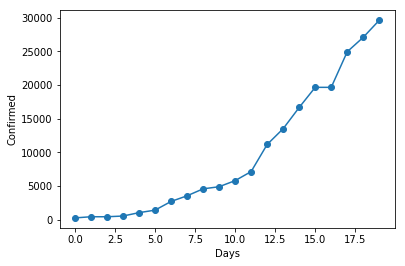

In [6]:
plt.plot(x, y, '-o')
plt.ylabel("Confirmed")
plt.xlabel("Days")

In [10]:
lin = LinearRegression() 
poly2 = PolynomialFeatures(degree = 2)
poly3 = PolynomialFeatures(degree = 3)
poly4 = PolynomialFeatures(degree = 4)
poly5 = PolynomialFeatures(degree = 5)

In [11]:
lin.fit(x, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

Text(0.5,0,'Days')

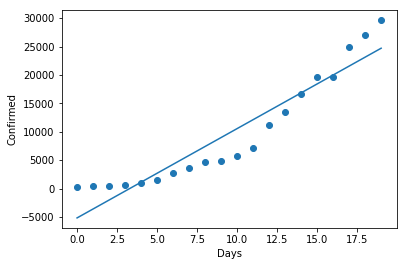

In [12]:
plt.scatter(x, y)
plt.plot(x, lin.predict(x), '-')
plt.ylabel("Confirmed")
plt.xlabel("Days")

In [13]:
x_poly2 = poly2.fit_transform(x)
poly2.fit(x, y)
lin2 = LinearRegression() 
lin2.fit(x_poly2, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [14]:
x_poly3 = poly3.fit_transform(x)
poly3.fit(x, y)
lin3 = LinearRegression() 
lin3.fit(x_poly3, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [15]:
x_poly4 = poly4.fit_transform(x)
poly4.fit(x, y)
lin4 = LinearRegression() 
lin4.fit(x_poly4, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [16]:
x_poly5 = poly5.fit_transform(x)
poly5.fit(x, y)
lin5 = LinearRegression() 
lin5.fit(x_poly5, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [131]:
x2 = []
for i in range(0, 22):
    x2.append(i)

In [132]:
x2 = np.asarray(x2).reshape(-1,1)

Text(0.5,1,'Hubei Cases and Forecasts')

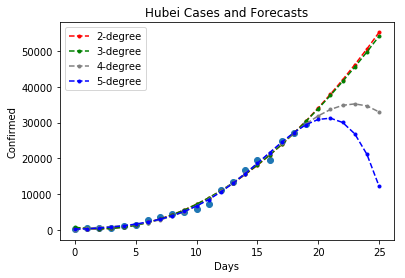

In [19]:
plt.scatter(x, y)
plt.plot(x2, lin2.predict(poly2.fit_transform(x2)), '--.', color = 'red')
plt.plot(x2, lin3.predict(poly3.fit_transform(x2)), '--.', color = 'green')
plt.plot(x2, lin4.predict(poly4.fit_transform(x2)), '--.', color = 'gray')
plt.plot(x2, lin5.predict(poly5.fit_transform(x2)), '--.', color = 'blue')
plt.ylabel("Confirmed")
plt.xlabel("Days")
plt.legend(('2-degree', '3-degree', '4-degree','5-degree'))
plt.title('Hubei Cases and Forecasts')

In [20]:
rms2 = sqrt(mse(y, lin2.predict(poly2.fit_transform(x))))
rms3 = sqrt(mse(y, lin3.predict(poly3.fit_transform(x))))
rms4 = sqrt(mse(y, lin4.predict(poly4.fit_transform(x))))
rms5 = sqrt(mse(y, lin5.predict(poly5.fit_transform(x))))
rsq2 = rsq(y, lin2.predict(poly2.fit_transform(x)))
rsq3 = rsq(y, lin3.predict(poly3.fit_transform(x)))
rsq4 = rsq(y, lin4.predict(poly4.fit_transform(x)))
rsq5 = rsq(y, lin5.predict(poly5.fit_transform(x)))

In [21]:
print('2-degree: RMSE: ' + str(rms2) + ' R2: ' + str(rsq2))
print('3-degree: RMSE: ' + str(rms3) + ' R2: ' + str(rsq3))
print('4-degree: RMSE: ' + str(rms4) + ' R2: ' + str(rsq4))
print('5-degree: RMSE: ' + str(rms5) + ' R2: ' + str(rsq5))

2-degree: RMSE: 836.9511433555766 R2: 0.9923916379157349
3-degree: RMSE: 834.9952023092771 R2: 0.9924271575966492
4-degree: RMSE: 728.9235055578682 R2: 0.9942289495764142
5-degree: RMSE: 714.9812798439239 R2: 0.9944476056895452


In [141]:
train_df = df[df.index < 14]
test_df = df[df.index >= 14]

In [142]:
train_x = train_df.index.values.reshape(-1, 1)
train_y = train_df['hubei'].values.reshape(-1, 1)
test_x = test_df.index.values.reshape(-1, 1)
test_y = test_df['hubei'].values.reshape(-1, 1)

In [143]:
x_poly2 = poly2.fit_transform(train_x)
poly2.fit(train_x, train_y)
lin2 = LinearRegression() 
lin2.fit(x_poly2, train_y)

x_poly3 = poly3.fit_transform(train_x)
poly3.fit(train_x, train_y)
lin3 = LinearRegression() 
lin3.fit(x_poly3, train_y)

x_poly4 = poly4.fit_transform(train_x)
poly4.fit(train_x, train_y)
lin4 = LinearRegression() 
lin4.fit(x_poly4, train_y)

x_poly5 = poly5.fit_transform(train_x)
poly5.fit(train_x, train_y)
lin5 = LinearRegression() 
lin5.fit(x_poly5, train_y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [ ]:
plt.scatter(x, y, color = 'black')
plt.plot(x2, lin2.predict(poly2.fit_transform(x2)), '--.', color = 'red')
plt.plot(x2, lin3.predict(poly3.fit_transform(x2)), '--.', color = 'green')
plt.plot(x2, lin4.predict(poly4.fit_transform(x2)), '--.', color = 'gray')
plt.plot(x2, lin5.predict(poly5.fit_transform(x2)), '--.', color = 'blue')
plt.ylabel("Confirmed")
plt.xlabel("Days")
plt.legend(('2-degree', '3-degree', '4-degree','5-degree'))
plt.title('Hubei Cases and Forecasts')

Text(0.5,1,'Hubei Cases and Forecasts')

In [140]:
rms2 = sqrt(mse(test_y, lin2.predict(poly2.fit_transform(test_x))))
rms3 = sqrt(mse(test_y, lin3.predict(poly3.fit_transform(test_x))))
rms4 = sqrt(mse(test_y, lin4.predict(poly4.fit_transform(test_x))))
rms5 = sqrt(mse(test_y, lin5.predict(poly5.fit_transform(test_x))))
rsq2 = rsq(test_y, lin2.predict(poly2.fit_transform(test_x)))
rsq3 = rsq(test_y, lin3.predict(poly3.fit_transform(test_x)))
rsq4 = rsq(test_y, lin4.predict(poly4.fit_transform(test_x)))
rsq5 = rsq(test_y, lin5.predict(poly5.fit_transform(test_x)))
print('2-degree: RMSE: ' + str(rms2) + ' R2: ' + str(rsq2))
print('3-degree: RMSE: ' + str(rms3) + ' R2: ' + str(rsq3))
print('4-degree: RMSE: ' + str(rms4) + ' R2: ' + str(rsq4))
print('5-degree: RMSE: ' + str(rms5) + ' R2: ' + str(rsq5))

2-degree: RMSE: 878.632474747848 R2: 0.7888111617627029
3-degree: RMSE: 1733.8031133924353 R2: 0.17765128886862558
4-degree: RMSE: 3294.5199842349775 R2: -1.9692088865818276
5-degree: RMSE: 19814.05910392734 R2: -106.39977397558415
